<table align="left">
  <td>
    <a href="https://colab.research.google.com/github/marco-canas/didactica_ciencia_datos/blob/main/referentes/geron/part_1/c_2/c_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>
  </td>
</table> 

## [Video de apoyo a la lectura de esta clase](https://www.youtube.com/watch?v=4JDqj1NT4Qk)

# Modelo de regresión para predicción de precio de vivienda

## Objetivo

* Construir un modelo de regresión para la predicción de precio de vivienda siguiendo la metodología de Aurelien Geron.

## Metodología de modelamiento para Machine Learning de Geron

1. Plantear, de manera justificada, la pregunta.
   * ¿Regresión o clasificación?
   * ¿Tipo de regresión y tipo de clasificación?

2. Exploración inicial.
   * Indicar la fuente de dónde se toman los datos.
   * Hacer explícita la función objetivo.
   * Decir cuáles son los atributos (descripción breve de cada uno)
   * Practicar una primera exploración gráfica de los datos.

3. Preparar los datos para los algoritmos de aprendizaje.
   * Hacer separación inicial de datos para entrenar y para testear.
   * Explorar correlaciones lineales con la variable objetivo.
   * Eliminar de ser necesario atributos que no sean de mucha utilidad.
   * Limpiar datos y llenar datos faltantes.
   * Estandarizar los datos.
   * Crear funciones en Python de manera que se puedan replicar los procesos de transformación de datos en proyectos nuevos.

4. Entrenamiento y selección de modelo.
   * Instanciar varios modelos y entrenarlos sobre datos de entrenamiento preparados.
   * Medir el desempeño de varios modelos (comparativa, con la técnica de la validación cruzada).

5. Afinar el modelo.
   * Crear cuadrícula (de búsqueda) de hiperparámetros.
   * Seleccionar la combinación de hiperparámetros que consigue el mejor puntaje. (El mejor modelo).

6. Presentar la solución.
   * Mostrar el desempeño sobre los datos para testear.
   * (Opcional) Gráfico intuitivo para representar el modelo.

[Video de apoyo sobre presentación de la metodología para modelo de machine Learning](https://www.youtube.com/watch?v=blRXFU2KooI)

# Implementación del plan 

1. Plantear bien la pregunta.
   * ¿Regresión o clasificación?
   * ¿Tipo de regresión y tipo de clasificación?

Tenemos un dataset con la siguiente configuración: $[X|y]$.  

$X = [x_{ij}] \in \mathbb{R}_{n,d}$.  
$X^{j}$: $j$ ésimo atributo.   
$X_{i}$: $i$ ésima fila o instancia ($i$ -ésimo distrito)  
$x_{ij}$: $ij$ ésima entrada de la matriz $X$.   
$y = [y_{i}] \in \mathbb{R}^{n}$: el vector de los valores promedios de vivienda.  
$y_{i}$ el valor promedio de vivienda en el $i$ ésimo distrito

Este es un problema de regresión porque lo que se trata es de predecir un valor o la función predictora de valor continuo o de valores en un intervalo de números reales. 

El tipo de regresión es lineal porque 

$$h_{w}(X_{i}) = y_{i} = w^{T}X_{i} = w \cdot X_{i} = w_{0} + w_{1}x_{i1} + \cdots + w_{d}x_{id} $$ 
$$ = \begin{pmatrix} w_{0} \\ w_{1} \\ \vdots \\ w_{d} \end{pmatrix} \cdot \begin{pmatrix} 1 \\ x_{i1} \\ \cdots \\ x_{id} \end{pmatrix} $$

donde $d$ es el número de atributos. 



# 2. Exploración inicial.

##  Indicar la fuente de dónde se toman los datos.

Su primera tarea es utilizar los datos del censo de California para construir un modelo de precios de viviendas en el estado.

Estos datos incluyen métricas como la población, el ingreso medio y el precio medio de la vivienda para cada grupo de bloques en California.

Los grupos de bloques son la unidad geográfica más pequeña para la que la Oficina del Censo de EE. UU. publica datos de muestra (un grupo de bloques suele tener una población de 600 a 3000 personas).

Los llamaremos “distritos” para abreviar.

Su modelo debe aprender de estos datos y poder predecir el precio medio de la vivienda en cualquier distrito, dadas todas las demás métricas.

# Hacer explícita la función objetivo.

$$ h:\mathbb{R}^{9} \to \mathbb{R} $$

$$ h(X_{n \times d}) = y $$

donde $X$ es una matriz alta (número de filas mucho mayor al número de columnas). 

$y$ es un vector de $\mathbb{R}^{m}$ cuyas entradas son los precios promedio de vivienda por distrito. 

$$ h(X_{i}) = y_{i} \in \mathbb{R}$$

## Decir cuáles son los atributos (descripción breve de cada uno)

Son nueve atributos o variables predictoras entre las que están:

* longitud
* latitud
* habitaciones
* dormitorios
* ingresos promedio
* proximidad al oceano
* antiguedad promedio de las viviendas en el distrito.
* Número de hogares
* población


## [Video de apoyo]()

## Practicar una primera exploración gráfica de los datos.

In [1]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 


In [2]:
v = pd.read_csv('vivienda.csv')  

In [3]:
v.head()

,longitud,latitud,antiguedad,habitaciones,dormitorios,población,hogares,ingresos,proximidad,precio
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,NEAR BAY,452600.0
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,NEAR BAY,358500.0
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,NEAR BAY,352100.0
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,NEAR BAY,341300.0
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,NEAR BAY,342200.0


In [4]:
v.head(2) 

,longitud,latitud,antiguedad,habitaciones,dormitorios,población,hogares,ingresos,proximidad,precio
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,NEAR BAY,452600.0
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,NEAR BAY,358500.0


In [5]:
v.tail()

,longitud,latitud,antiguedad,habitaciones,dormitorios,población,hogares,ingresos,proximidad,precio
20635,-121.09,39.48,25.0,1665.0,374.0,845.0,330.0,1.5603,INLAND,78100.0
20636,-121.21,39.49,18.0,697.0,150.0,356.0,114.0,2.5568,INLAND,77100.0
20637,-121.22,39.43,17.0,2254.0,485.0,1007.0,433.0,1.7000,INLAND,92300.0
20638,-121.32,39.43,18.0,1860.0,409.0,741.0,349.0,1.8672,INLAND,84700.0
20639,-121.24,39.37,16.0,2785.0,616.0,1387.0,530.0,2.3886,INLAND,89400.0


In [6]:
v.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   longitud      20640 non-null  float64
 1   latitud       20640 non-null  float64
 2   antiguedad    20640 non-null  float64
 3   habitaciones  20640 non-null  float64
 4   dormitorios   20433 non-null  float64
 5   población     20640 non-null  float64
 6   hogares       20640 non-null  float64
 7   ingresos      20640 non-null  float64
 8   proximidad    20640 non-null  object 
 9   precio        20640 non-null  float64
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


<AxesSubplot:>

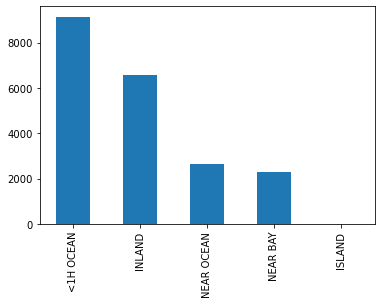

In [7]:
v.proximidad.value_counts().plot(kind = 'bar')

In [8]:
v.describe() 

,longitud,latitud,antiguedad,habitaciones,dormitorios,población,hogares,ingresos,precio
count,20640.000000,20640.000000,20640.000000,20640.000000,20433.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,-119.569704,35.631861,28.639486,2635.763081,537.870553,1425.476744,499.539680,3.870671,206855.816909
std,2.003532,2.135952,12.585558,2181.615252,421.385070,1132.462122,382.329753,1.899822,115395.615874
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000
25%,-121.800000,33.930000,18.000000,1447.750000,296.000000,787.000000,280.000000,2.563400,119600.000000
50%,-118.490000,34.260000,29.000000,2127.000000,435.000000,1166.000000,409.000000,3.534800,179700.000000
75%,-118.010000,37.710000,37.000000,3148.000000,647.000000,1725.000000,605.000000,4.743250,264725.000000
max,-114.310000,41.950000,52.000000,39320.000000,6445.000000,35682.000000,6082.000000,15.000100,500001.000000


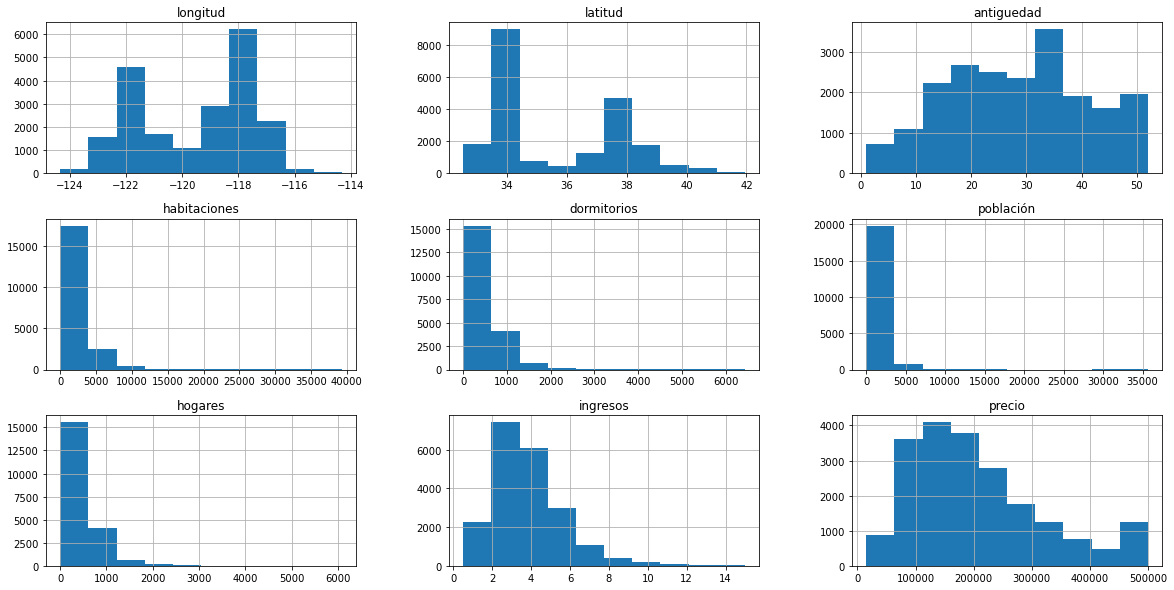

In [9]:
import matplotlib.pyplot as plt

v.hist(figsize = (20,10))

plt.show() 

## Visualización de datos geográficos 


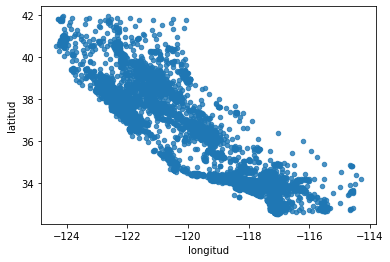

In [10]:
v.plot(kind = 'scatter', x = 'longitud', y = 'latitud', alpha = 0.8)

plt.show() 

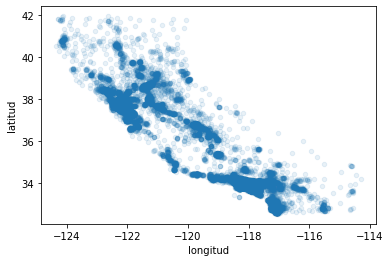

In [11]:
v.plot(kind = 'scatter', x = 'longitud', y = 'latitud', alpha = 0.1) 

plt.show() 

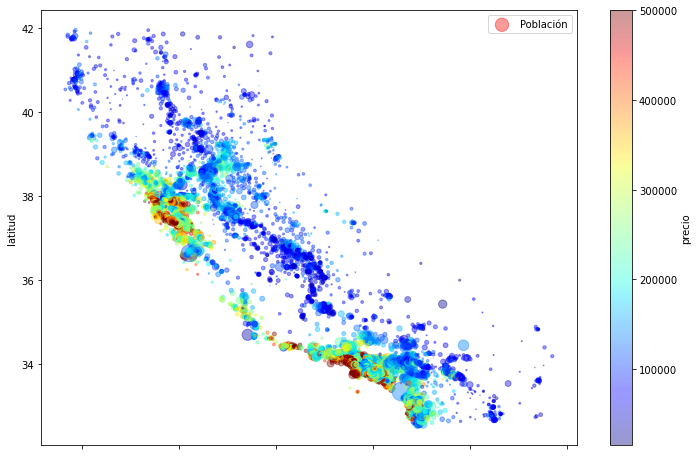

In [12]:
v.plot(kind = 'scatter', x = 'longitud', y = 'latitud', alpha = 0.4, \
      s = v.población/100, label = 'Población', \
      c = 'precio', cmap = plt.get_cmap('jet'), colorbar = True, figsize = (12, 8))  

# s de size o tamaño del punto. 
plt.savefig('california_4D.jpg')

plt.show() 

# 3. Preparar los datos para los algoritmos de aprendizaje.

## Hacer separación inicial de datos para entrenar y para testear.

In [13]:
import numpy as np 
np.random.seed(42) 
# establecer una semilla aleatoria para hacer 
# reproducible la separación o muestreo aleatorio

def dividir_entrenamiento_testeo(datos, porcentaje_testeo):
    indices_reordenados = np.random.permutation(len(datos))
    tamaño_conjunto_testeo = int(len(datos)*porcentaje_testeo)
    indices_testeo = indices_reordenados[:tamaño_conjunto_testeo]
    indices_entrenamiento = indices_reordenados[tamaño_conjunto_testeo:]
    return datos.iloc[indices_entrenamiento], datos.iloc[indices_testeo]

In [14]:
v_train, v_test = dividir_entrenamiento_testeo(v, 0.2)

In [15]:
len(v_train), len(v_test) 

(16512, 4128)

In [16]:
len(v_train)+ len(v_test) 

20640

In [17]:
len(v_train)/len(v_test) 


4.0

# Separación del dataset en entrenamiento y testeo usando sklearn

In [18]:
from sklearn.model_selection import train_test_split

v_train, v_test = train_test_split(v, test_size = 0.2, random_state = 42)

De ahora en adelante se seguirá es procesando a los datos de entrenamiento

## Limpiar datos y llenar datos faltantes.

In [19]:
mediana  = v.dormitorios.median() 

In [20]:
mediana 

435.0

In [21]:
v.dormitorios.fillna(mediana)

0         129.0
1        1106.0
2         190.0
3         235.0
4         280.0
          ...  
20635     374.0
20636     150.0
20637     485.0
20638     409.0
20639     616.0
Name: dormitorios, Length: 20640, dtype: float64

In [22]:
len(pd.DataFrame(v.dormitorios.fillna(mediana)))

20640

# Imputación de datos faltantes

In [23]:
from sklearn.impute import SimpleImputer

In [24]:
imputado = SimpleImputer(strategy = 'median') 

In [25]:
v_num = v.drop(['proximidad'], axis = 1)

In [26]:
imputado.fit(v_num)

SimpleImputer(strategy='median')

In [27]:
X = imputado.fit_transform(v_num) 

In [28]:
v_num_imputado = pd.DataFrame(X,\
                     columns = v_num.columns, \
                     index = v_num.index) 

In [29]:
v_num_imputado.info() 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   longitud      20640 non-null  float64
 1   latitud       20640 non-null  float64
 2   antiguedad    20640 non-null  float64
 3   habitaciones  20640 non-null  float64
 4   dormitorios   20640 non-null  float64
 5   población     20640 non-null  float64
 6   hogares       20640 non-null  float64
 7   ingresos      20640 non-null  float64
 8   precio        20640 non-null  float64
dtypes: float64(9)
memory usage: 1.4 MB


## Explorar correlaciones lineales con la variable objetivo.

<img src = 'https://upload.wikimedia.org/wikipedia/commons/thumb/d/d4/Correlation_examples2.svg/759px-Correlation_examples2.svg.png'>

In [30]:
v.corr() 

,longitud,latitud,antiguedad,habitaciones,dormitorios,población,hogares,ingresos,precio
longitud,1.000000,-0.924664,-0.108197,0.044568,0.069608,0.099773,0.055310,-0.015176,-0.045967
latitud,-0.924664,1.000000,0.011173,-0.036100,-0.066983,-0.108785,-0.071035,-0.079809,-0.144160
antiguedad,-0.108197,0.011173,1.000000,-0.361262,-0.320451,-0.296244,-0.302916,-0.119034,0.105623
habitaciones,0.044568,-0.036100,-0.361262,1.000000,0.930380,0.857126,0.918484,0.198050,0.134153
dormitorios,0.069608,-0.066983,-0.320451,0.930380,1.000000,0.877747,0.979728,-0.007723,0.049686
población,0.099773,-0.108785,-0.296244,0.857126,0.877747,1.000000,0.907222,0.004834,-0.024650
hogares,0.055310,-0.071035,-0.302916,0.918484,0.979728,0.907222,1.000000,0.013033,0.065843
ingresos,-0.015176,-0.079809,-0.119034,0.198050,-0.007723,0.004834,0.013033,1.000000,0.688075
precio,-0.045967,-0.144160,0.105623,0.134153,0.049686,-0.024650,0.065843,0.688075,1.000000


In [31]:
v.corr().precio.sort_values(ascending = False) 

precio          1.000000
ingresos        0.688075
habitaciones    0.134153
antiguedad      0.105623
hogares         0.065843
dormitorios     0.049686
población      -0.024650
longitud       -0.045967
latitud        -0.144160
Name: precio, dtype: float64

In [32]:
from pandas.plotting import scatter_matrix 

# Eliminar de ser necesario atributos que no sean de mucha utilidad. Ingeniería de atributos.

# Experimentación con combinación de atributos 

Una última cosa que quizás desee hacer antes de preparar los datos para los algoritmos de Machine Learning es probar varias combinaciones de atributos.

Por ejemplo, el número total de habitaciones en un distrito no es muy útil si no sabe cuántos hogares hay. 

Lo que realmente desea es el número de habitaciones por hogar. 

Del mismo modo, el número total de dormitorios por sí solo no es muy útil: probablemente quieras compararlo con el número de habitaciones.

Y la población por hogar también parece una combinación de atributos interesante para observar.

Vamos a crear estos nuevos atributos:

In [33]:
v.head(1)

,longitud,latitud,antiguedad,habitaciones,dormitorios,población,hogares,ingresos,proximidad,precio
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,NEAR BAY,452600.0


In [34]:
v["habitaciones_por_hogar"] = v["habitaciones"]/v["hogares"]

In [35]:
v["población_por_hogar"] = v["población"]/v["hogares"] 

In [36]:
v['dormitorios_por_habitacion'] = v.dormitorios/v.habitaciones

In [37]:
corr_matrix = v.corr()
corr_matrix['precio'].sort_values(ascending=False)

precio                        1.000000
ingresos                      0.688075
habitaciones_por_hogar        0.151948
habitaciones                  0.134153
antiguedad                    0.105623
hogares                       0.065843
dormitorios                   0.049686
población_por_hogar          -0.023737
población                    -0.024650
longitud                     -0.045967
latitud                      -0.144160
dormitorios_por_habitacion   -0.255880
Name: precio, dtype: float64

# Manipulación de datos categóricos

In [38]:
v_cat = v[['proximidad']] 
# Recuerde que la clase OrdinalEncoder exige que el atributo categórico se entregue 
#en la forma de arreglo 2D

In [39]:
v_cat.value_counts()

proximidad
<1H OCEAN     9136
INLAND        6551
NEAR OCEAN    2658
NEAR BAY      2290
ISLAND           5
dtype: int64

In [40]:
from sklearn.preprocessing  import OrdinalEncoder 

In [41]:
ordinal_encoder = OrdinalEncoder()

In [42]:
v_cat_codificado = ordinal_encoder.fit_transform(v_cat) 

In [43]:
v_cat_codificado[:10] 

array([[3.],
       [3.],
       [3.],
       [3.],
       [3.],
       [3.],
       [3.],
       [3.],
       [3.],
       [3.]])

# Estandarizar los datos.
   

# Transformadores personalizados

Aunque Scikit-Learn proporciona muchos transformadores útiles, deberá escribir los suyos propios para tareas como operaciones de limpieza personalizadas o combinación de atributos específicos.

You will want your transformer to work seamlessly with Scikit-Learn functionalities (such as pipelines), and since Scikit-Learn relies on duck typing (not inheritance), all you need to do is create a class and implement three methods: 
* `fit()` (returning self), 
* `transform()`, and 
* `fit_transform()`.

You can get the last one for free by simply adding TransformerMixin as a base class. 

If you add BaseEstimator as a base class (and avoid *args and **kargs in your constructor), you will also get two extra methods (get_params() and set_params()) that will be useful for automatic hyperparameter tuning.

For example, here is a small transformer class that adds the combined attributes we discussed earlier:

In [44]:
from sklearn.base import BaseEstimator, TransformerMixin

In [45]:
rooms_ix, bedrooms_ix, population_ix, households_ix = 3, 4, 5, 6

In [46]:
class CombinedAttributesAdder(BaseEstimator, TransformerMixin):
    def __init__(self, add_bedrooms_per_room = True): # no *args or **kargs
         self.add_bedrooms_per_room = add_bedrooms_per_room
    def fit(self, X, y=None):
        return self               # nothing else to do
    def transform(self, X, y=None):
        rooms_per_household = X[:, rooms_ix] / X[:, households_ix]
        population_per_household = X[:, population_ix] / X[:, households_ix]
        if self.add_bedrooms_per_room:
            bedrooms_per_room = X[:, bedrooms_ix] / X[:, rooms_ix]
            return np.c_[X, rooms_per_household, population_per_household, bedrooms_per_room]
        else:
            return np.c_[X, rooms_per_household, population_per_household]

In [47]:
attr_adder = CombinedAttributesAdder(add_bedrooms_per_room=False)

In [49]:
v_extra_attribs = attr_adder.transform(v_train.values)